<a href="https://colab.research.google.com/github/vitao-bolado/Trabalho1_AnaliseDados/blob/main/Trabalho1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabalho 1 - Analise de rotatividade de Clientes Bancários**<br>
**Desenvolvido por** José Vinicius e Vitor Faustino<Br>


*   Identicar os fatores que influenciam a saída dos clientes;
*   Comparar o perfil de clientes que saíram com os que permaneceram;
*   Desenvolver modelos preditivos de churn;
*   Trabalhar com variáveis categóricas e numéricas simultaneamente.


**ETAPA 1** - Carregando bibliotecas e base de dados

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive"

Mounted at /content/drive


In [3]:
df = pd.read_csv(path + '/06_rotatividade_clientes_bancários.csv', sep=',')

ETAPA 2 - Visualizando a base de dados

In [4]:
print(f'A Base possui {df.shape[0]} registros;')
print(f'E há {df.shape[1]} variáveis.')
print(f'\nOs tipos das variaveis são do tipo:\n{df.dtypes}')

df.head(5)

A Base possui 10002 registros;
E há 14 variáveis.

Os tipos das variaveis são do tipo:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


ETAPA 3 - Tratando a base de dados

In [5]:
#Removendo colunas não usadas
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


ETAPA 3.1 - Verificando nulos

In [6]:
# Verificando valores nulos
df.isnull().sum().rename('Quantidade').sort_values(ascending=False)

,Quantidade
Geography,1
HasCrCard,1
Age,1
IsActiveMember,1
CreditScore,0
Gender,0
Tenure,0
NumOfProducts,0
Balance,0
EstimatedSalary,0


ETAPA 3.2 - Removendo nulos

In [7]:
# Excluindo linhas com valores nulos
df.dropna(inplace=True)

ETAPA 4 - ESTATÍSTICAS INICIAS

In [8]:
cols= [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'EstimatedSalary'
]
df[cols].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,650.529606,38.920287,5.013003,76481.490819,1.530206,100099.786455
std,96.633003,10.487986,2.892152,62393.187035,0.581669,57510.939962
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,50983.750000
50%,652.000000,37.000000,5.000000,97173.290000,1.000000,100218.210000
75%,718.000000,44.000000,7.000000,127641.417500,2.000000,149395.882500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


ETAPA 5 - Tipo de Distribuição de variaveis

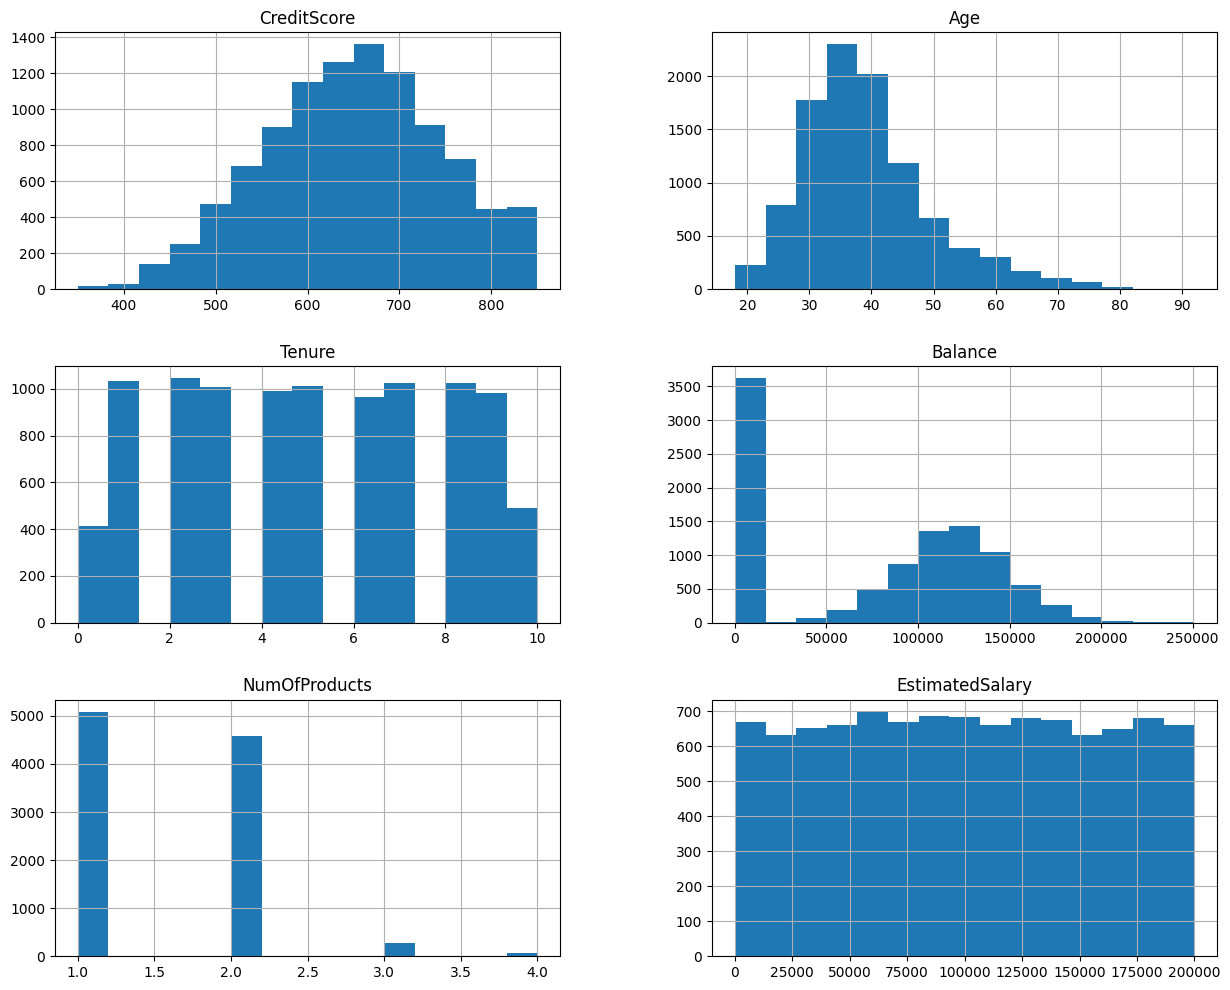

In [9]:
df[cols].hist(bins=15, figsize=(15,12));

ETAPA 6 - Vizualizando Outliers

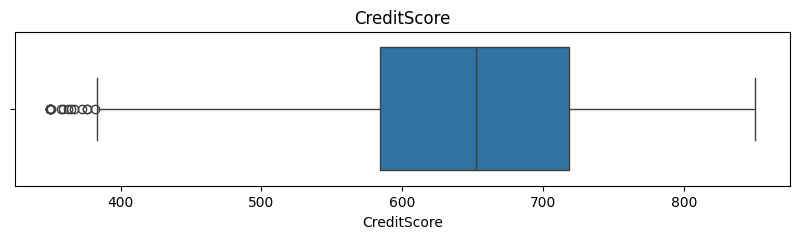

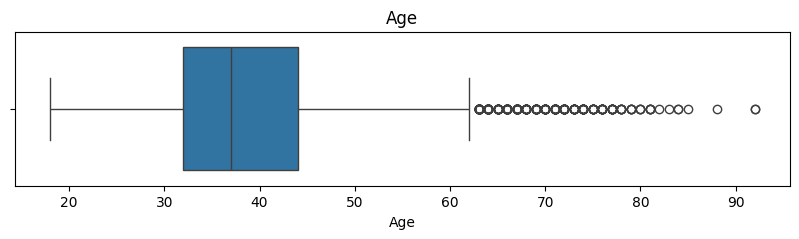

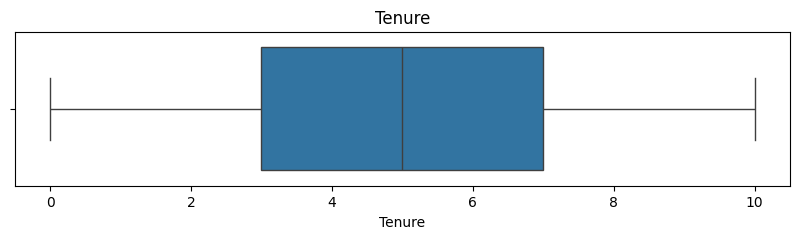

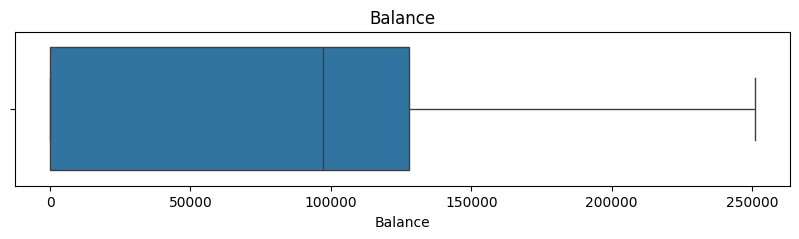

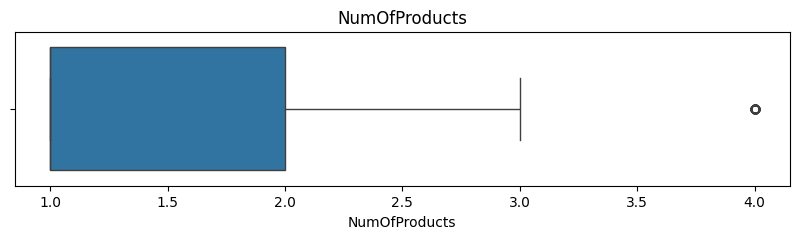

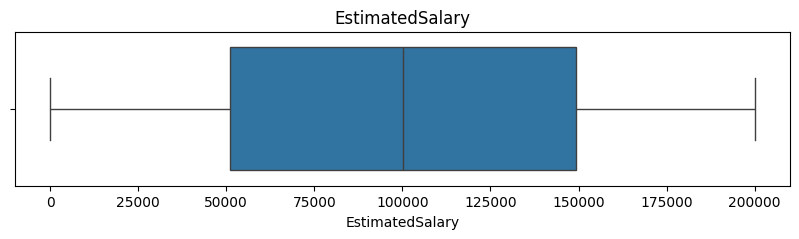

In [10]:
for col in cols:
    plt.figure(figsize=(10,2))
    sns.boxplot(data=df[col], orient='h')
    plt.title(f'{col}')
    plt.show()

ETAPA 7 — Comparação entre clientes que permaneceram e que saíram do banco

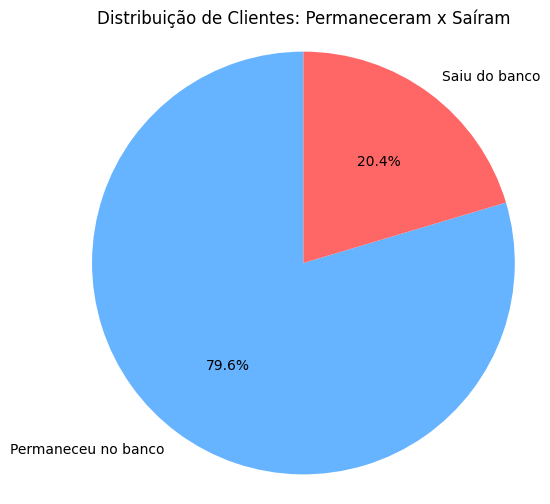

In [11]:
import matplotlib.pyplot as plt

# Contando quantos clientes saíram e quantos ficaram
contagem_saida = df['Exited'].value_counts()

# Rótulos para o gráfico
labels = ['Permaneceu no banco', 'Saiu do banco']

# Cores
cores = ['#66b3ff', '#ff6666']

# Criando o gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(contagem_saida, labels=labels, autopct='%1.1f%%', startangle=90, colors=cores)
plt.title('Distribuição de Clientes: Permaneceram x Saíram')
plt.axis('equal')
plt.show()


Etapa 7.1 - Montando as classes

In [12]:
#Fazendo uma copia do DF que tera os valores substituidos por classes
dfClasses = df;

Etapa 7.1.1 - CreditScore

In [13]:
#definindo classes
  #CreditScore
    #Muita baixa (0 a 300)
    #Baixa (301 a 500)
    #Bom (501 a 700)
    #Excelente (701+)



valores = [0, 301, 501, 701, df['CreditScore'].max()]
classes = ['Muito Baixa',
           'Baixa',
           'Bom',
           'Excelente']

dfClasses['CreditScore'] = pd.cut(df['CreditScore'], bins=valores, labels=classes)
dfClasses = pd.DataFrame(dfClasses)

dfClasses.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Bom,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,Bom,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,Bom,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,Bom,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,Bom,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


Etapa 7.1.2 - Age

In [14]:
  #Age
    #18_36
    #37_55
    #56_74
    #75+
valores = [17, 37, 56, 75, df['Age'].max()]
classes = ['18_36',
           '37_55',
           '56_74',
           '75+']

dfClasses['Age'] = pd.cut(df['Age'], bins=valores, labels=classes)
dfClasses = pd.DataFrame(dfClasses)

dfClasses.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Bom,France,Female,37_55,2,0.00,1,1.0,1.0,101348.88,1
1,Bom,Spain,Female,37_55,1,83807.86,1,0.0,1.0,112542.58,0
2,Bom,France,Female,37_55,8,159660.80,3,1.0,0.0,113931.57,1
3,Bom,France,Female,37_55,1,0.00,2,0.0,0.0,93826.63,0
5,Bom,Spain,Male,37_55,8,113755.78,2,1.0,0.0,149756.71,1


7.1.3 - Balance

In [15]:
  #Balance
    #0,00 — 41.816,35 - Baixo
    #41.816,36 — 83.632,70 - Medio-Baixo
    #83.632,71 — 125.449,05 - Medio
    #125.449,06 — 167.265,40 - Medio-Alto
    #167.265,41 — 209.081,75 - Alto
    #209.081,76 — 250.898,09 - Muito Alto

valores = [-1, 41816.36, 83632.71, 125449.06, 167265.41, 209081.76, df['Balance'].max()]
classes = ['Baixo',
           'Medio-Baixo',
           'Medio',
           'Medio-Alto',
           'Alto',
           'Muito Alto']

dfClasses['Balance'] = pd.cut(df['Balance'], bins=valores, labels=classes)
dfClasses = pd.DataFrame(dfClasses)

dfClasses.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Bom,France,Female,37_55,2,Baixo,1,1.0,1.0,101348.88,1
1,Bom,Spain,Female,37_55,1,Medio,1,0.0,1.0,112542.58,0
2,Bom,France,Female,37_55,8,Medio-Alto,3,1.0,0.0,113931.57,1
3,Bom,France,Female,37_55,1,Baixo,2,0.0,0.0,93826.63,0
5,Bom,Spain,Male,37_55,8,Medio,2,1.0,0.0,149756.71,1


7.1.4 - EstimatedSalary

In [16]:
  #EstimatedSalary
    #0,00 — 49.995,23 - Baixo
    #49.995,24 — 99.990,47 - Medio-Baixo
    #99.990,48 — 149.985,71 - Medio-Alto
    #149.985,72 — 199.992,48 - Alto

valores = [-1, 49995.24, 99990.48, 149985.72, df['EstimatedSalary'].max()]
classes = ['Baixo',
           'Medio-Baixo',
           'Medio-Alto',
           'Alto']

dfClasses['EstimatedSalary'] = pd.cut(df['EstimatedSalary'], bins=valores, labels=classes)
dfClasses = pd.DataFrame(dfClasses)

dfClasses.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Bom,France,Female,37_55,2,Baixo,1,1.0,1.0,Medio-Alto,1
1,Bom,Spain,Female,37_55,1,Medio,1,0.0,1.0,Medio-Alto,0
2,Bom,France,Female,37_55,8,Medio-Alto,3,1.0,0.0,Medio-Alto,1
3,Bom,France,Female,37_55,1,Baixo,2,0.0,0.0,Medio-Baixo,0
5,Bom,Spain,Male,37_55,8,Medio,2,1.0,0.0,Medio-Alto,1


7.1.5 - NumOfProducts

In [17]:
  #NumOfProducts
    #1_Produto
    #2_Produtos
    #3_Produtos
    #4+_Produtos

valores = [0, 1, 2, 3, df['NumOfProducts'].max()]
classes = ['1_Produto',
           '2_Produtos',
           '3_Produtos',
           '4+_Produtos']

dfClasses['NumOfProducts'] = pd.cut(df['NumOfProducts'], bins=valores, labels=classes)
dfClasses = pd.DataFrame(dfClasses)

dfClasses.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Bom,France,Female,37_55,2,Baixo,1_Produto,1.0,1.0,Medio-Alto,1
1,Bom,Spain,Female,37_55,1,Medio,1_Produto,0.0,1.0,Medio-Alto,0
2,Bom,France,Female,37_55,8,Medio-Alto,3_Produtos,1.0,0.0,Medio-Alto,1
3,Bom,France,Female,37_55,1,Baixo,2_Produtos,0.0,0.0,Medio-Baixo,0
5,Bom,Spain,Male,37_55,8,Medio,2_Produtos,1.0,0.0,Medio-Alto,1


7.2 - Comparando variaveis agrupado por quem saiu do banco

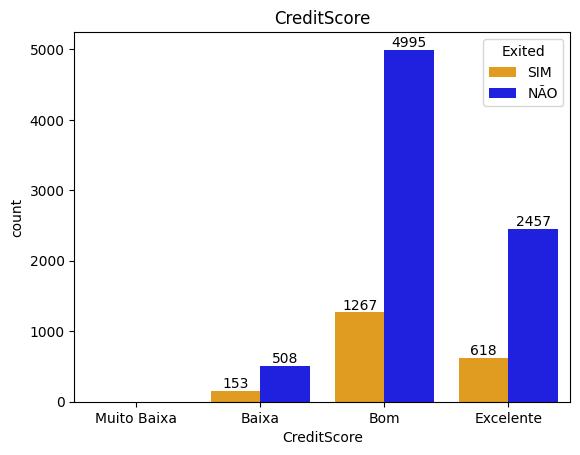

<Figure size 1000x500 with 0 Axes>

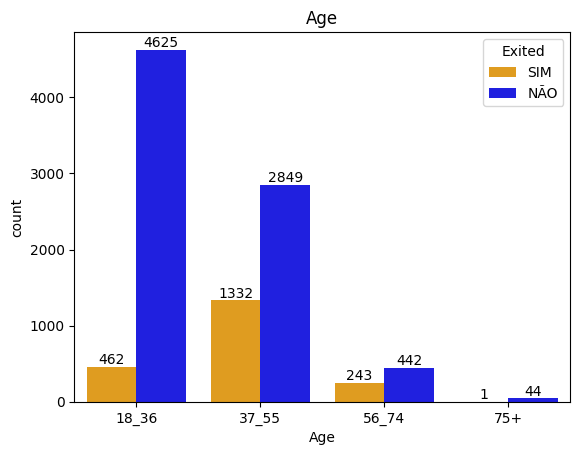

<Figure size 1000x500 with 0 Axes>

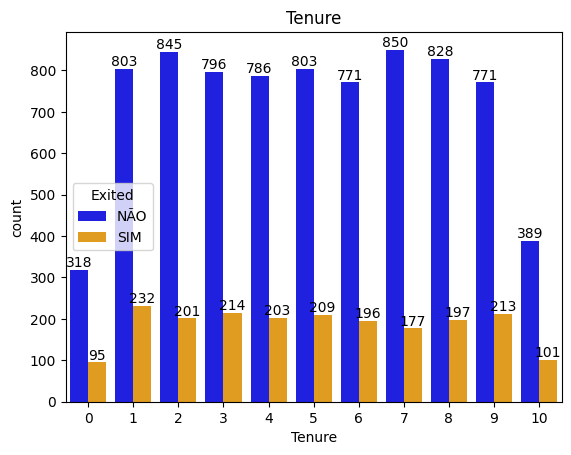

<Figure size 1000x500 with 0 Axes>

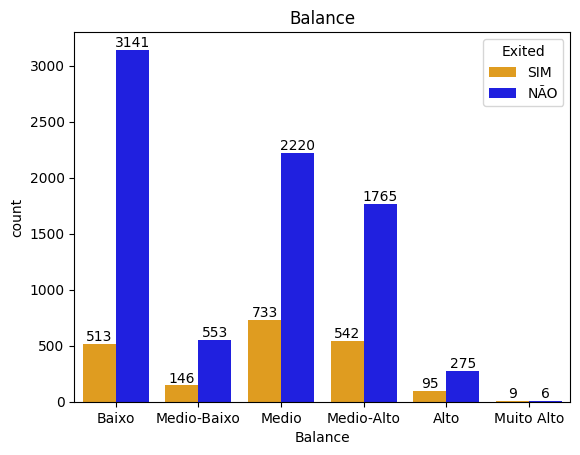

<Figure size 1000x500 with 0 Axes>

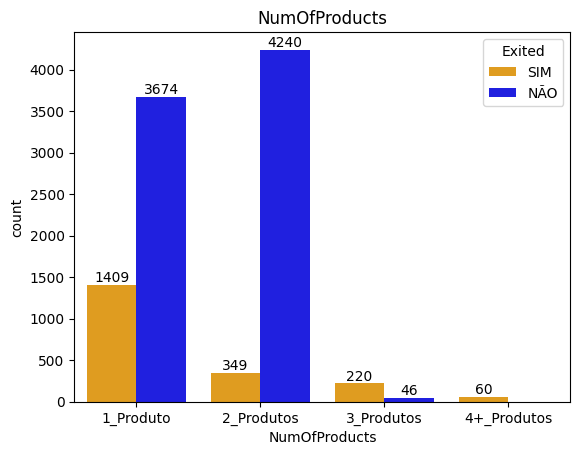

<Figure size 1000x500 with 0 Axes>

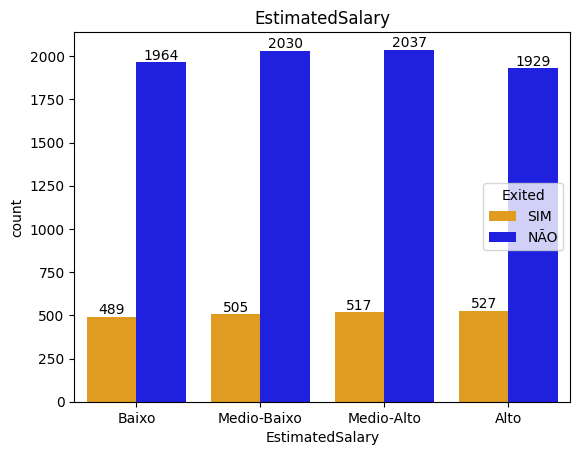

<Figure size 1000x500 with 0 Axes>

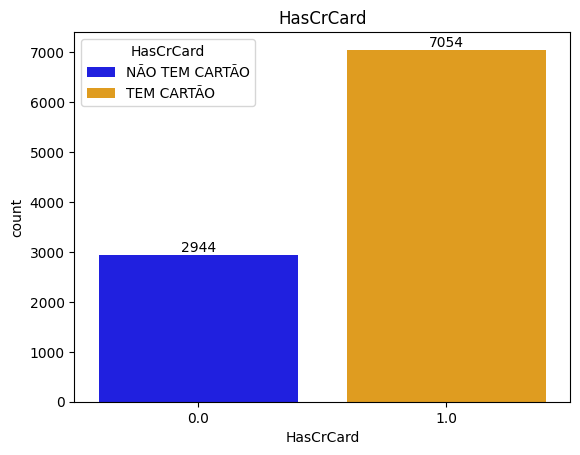

<Figure size 1000x500 with 0 Axes>

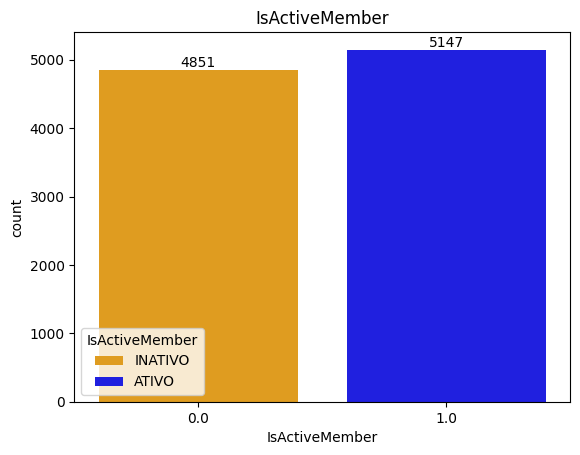

<Figure size 1000x500 with 0 Axes>

In [18]:
saiu = df['Exited'].replace({0: 'NÃO', 1: 'SIM'})
cartao = df['HasCrCard'].replace({0: 'NÃO TEM CARTÃO', 1: 'TEM CARTÃO'})
ativo = df['IsActiveMember'].replace({0: 'INATIVO', 1: 'ATIVO'})
grafico = 0

cols= [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'EstimatedSalary',
    'HasCrCard',
    'IsActiveMember'
]

for col in cols:
    if col == 'HasCrCard':
      cores = {
        'NÃO TEM CARTÃO': 'blue',
        'TEM CARTÃO': 'orange'
        }
      grafico = sns.countplot(x=col, hue=cartao, data=dfClasses, palette=cores)
      plt.title(col)
    elif col == 'IsActiveMember':
      cores = {
        'ATIVO': 'blue',
        'INATIVO': 'orange'
        }
      grafico = sns.countplot(x=col, hue=ativo, data=dfClasses, palette=cores)
      plt.title(col)
    else:
      cores = {
        'NÃO': 'blue',
        'SIM': 'orange'
        }
      grafico = sns.countplot(x=col, hue=saiu, data=dfClasses, palette=cores)
      plt.title(col)

    grafico.bar_label(grafico.containers[0])
    grafico.bar_label(grafico.containers[1])
    plt.figure(figsize=(10,5))
    plt.show()

Etapa 7.2 - Análise de variáveis categóricas

In [19]:
# Comparando a porcentagem de saída por categoria em 'Gender' e 'Geography'
for col in ['Gender', 'Geography']:
    cruzamento = pd.crosstab(df[col], df['Exited'], normalize='index') * 100
    print(f'\nDistribuição de saída por {col} (%):\n', cruzamento)


Distribuição de saída por Gender (%):
 Exited          0          1
Gender                      
Female  74.928461  25.071539
Male    83.519707  16.480293

Distribuição de saída por Geography (%):
 Exited             0          1
Geography                      
France     83.838787  16.161213
Germany    67.529880  32.470120
Spain      83.319871  16.680129


7.2.1 - Aprofundando a Análise

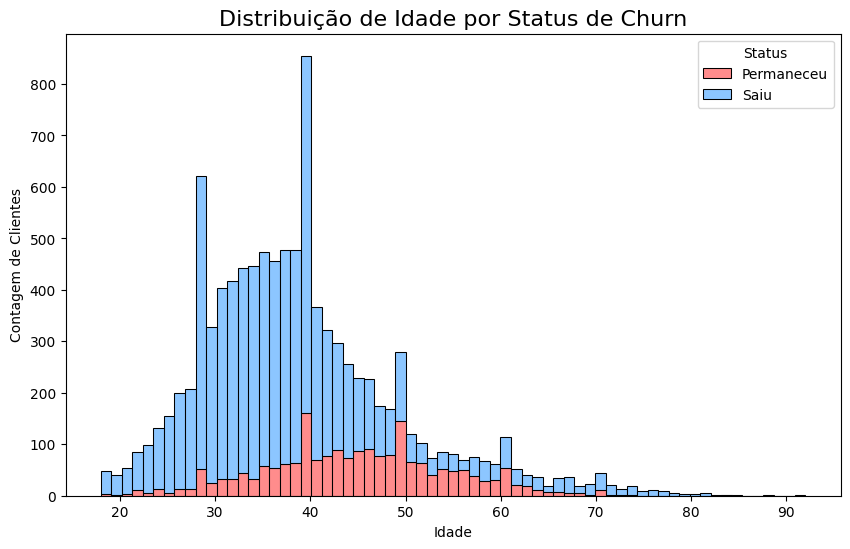

In [20]:
# Criando um histograma para mostrar a distribuição da idade para os clientes que saíram para os que permaneceram.
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', palette={0: '#66b3ff', 1: '#ff6666'})
plt.title('Distribuição de Idade por Status de Churn', fontsize=16)
plt.xlabel('Idade')
plt.ylabel('Contagem de Clientes')
plt.legend(title='Status', labels=['Permaneceu', 'Saiu'])
plt.show()

Etapa 7.2.2 - Análise de Saldo de Contas Zeradas

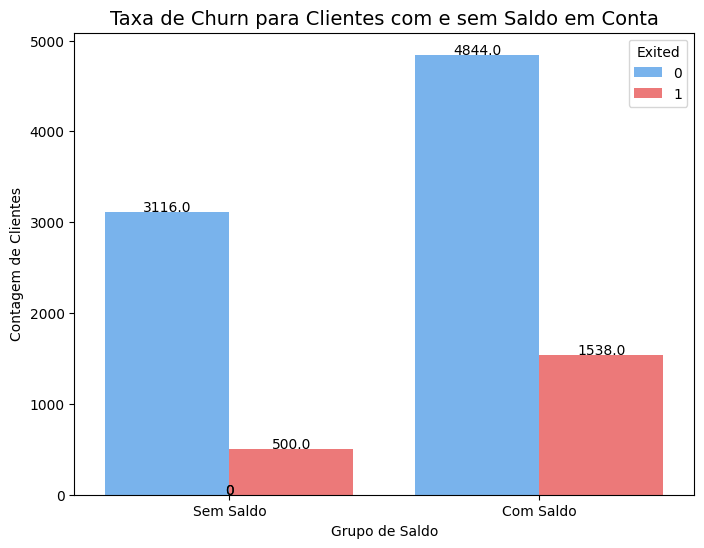

In [28]:
# Criando as categorias "Sem Saldo" e "Com Saldo" para comparar a taxa de churn entre os grupos
df['GrupoSaldo'] = df['Balance'].apply(lambda x: 'Com Saldo' if x > 0 else 'Sem Saldo')

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='GrupoSaldo', hue='Exited', palette=['#66b3ff', '#ff6666'])
plt.title('Taxa de Churn para Clientes com e sem Saldo em Conta', fontsize=14)
plt.ylabel('Contagem de Clientes')
plt.xlabel('Grupo de Saldo')

# Adiciona a porcentagem de churn no gráfico
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5, f'{height}', ha='center')
plt.show()

Etapa 7.2.3 - Análise Categórica Cruzada <br>
<br>
Aqui vamos usar o catplot para visualizar a contagem de churn por geografia, segmentada por gênero.

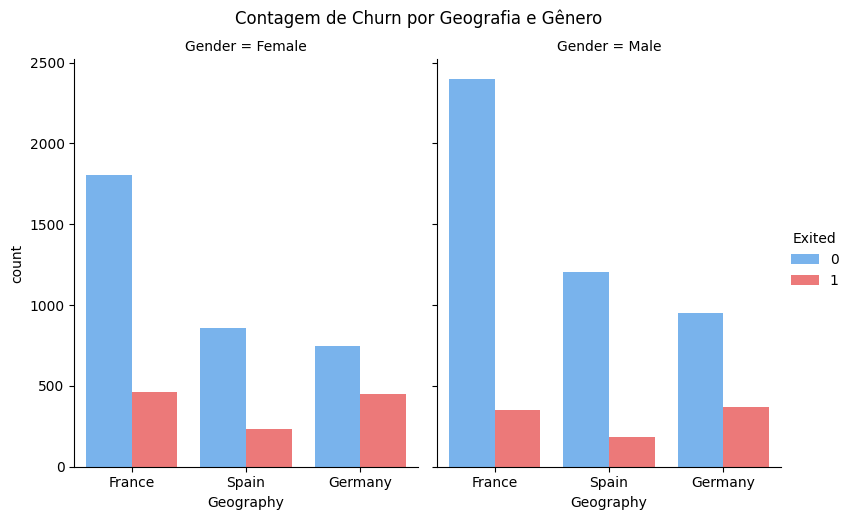

In [29]:
sns.catplot(x="Geography", hue="Exited", col="Gender",
            data=df, kind="count",
            height=5, aspect=.8, palette=['#66b3ff', '#ff6666'])
plt.suptitle('Contagem de Churn por Geografia e Gênero', y=1.03)
plt.show()

Etapa 7.3 - Mapa de Calor das Correlações entre Variáveis Numéricas<br>

Heatmap de Correlação

O heatmap exibe a matriz de correlação de Pearson entre todas as variáveis numéricas da base de dados. Essa análise permite identificar relações lineares entre variáveis, com foco especial na coluna `Exited`, que representa a saída do cliente.

Principais pontos observados foram:

- `Age` apresenta a maior correlação com `Exited` (0.29), indicando que a idade influencia na rotatividade.
- `IsActiveMember` possui correlação negativa com `Exited` (-0.16), sugerindo que membros ativos tendem a permanecer.
- `Balance` tem correlação positiva moderada (0.12), o que pode indicar que clientes com saldo mais alto saem mais, possivelmente por movimentação de grandes valores.
- Outras variáveis mostraram correlação fraca ou irrelevante, o que indica que isoladamente não explicam bem o churn.

Este gráfico auxilia na identificação de variáveis com potencial explicativo para modelagem preditiva e tomada de decisão.


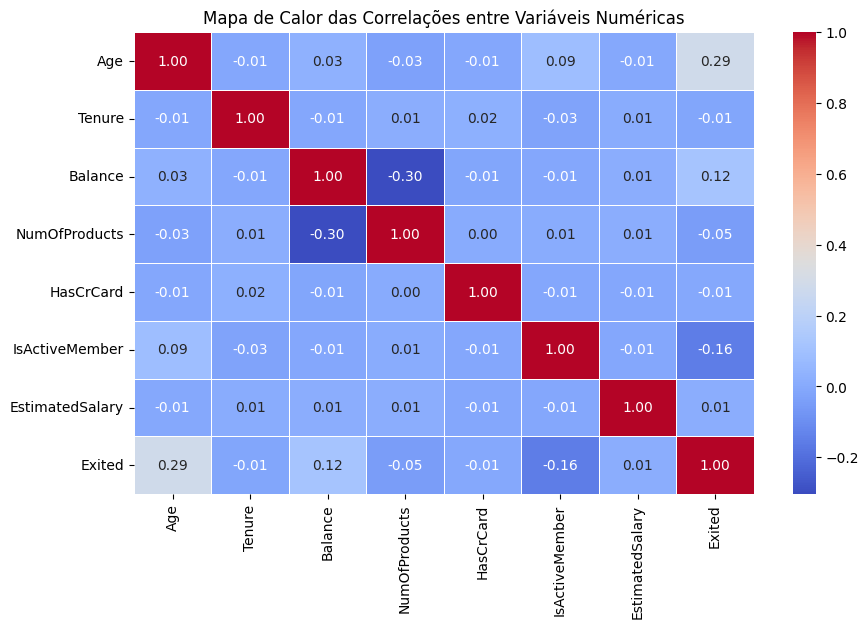

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de correlação apenas para variáveis numéricas
correlacoes = df.corr(numeric_only=True)

# Cria o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Título
plt.title('Mapa de Calor das Correlações entre Variáveis Numéricas')
plt.show()

ETAPA 8 — Formulação e Teste de Hipóteses

Hipósteses:

Hipótese 1: Clientes com apenas 1 produto bancário saem mais do que os demais.<br>
Hipótese 2: Clientes ativos (IsActiveMember == 1) permanecem mais no banco.<br>Hipótese 3: Idade elevada está associada à maior chance de saída.

Etapa 8.1 - Elaboração de gráficos para testar as hipóteses

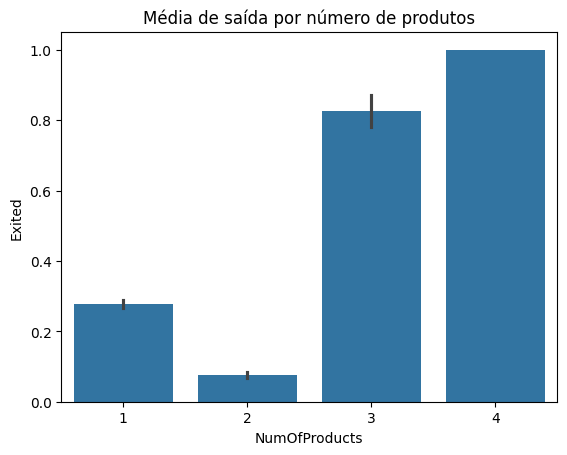

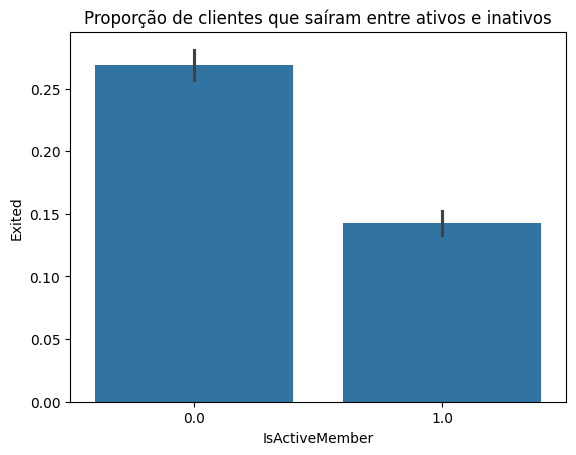

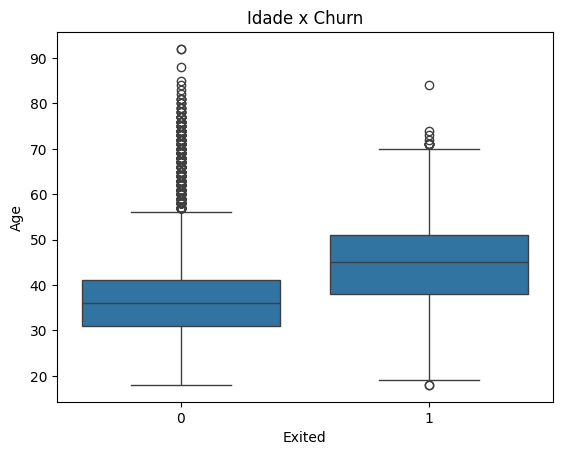

In [22]:
# Hipótese 1: Número de produtos x saída
sns.barplot(x='NumOfProducts', y='Exited', data=df)
plt.title('Média de saída por número de produtos')
plt.show()

# Hipótese 2: Cliente ativo x saída
sns.barplot(x='IsActiveMember', y='Exited', data=df)
plt.title('Proporção de clientes que saíram entre ativos e inativos')
plt.show()

# Hipótese 3: Idade x saída
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Idade x Churn')
plt.show()

Etapa 8.2 - Teste estatístico básico

In [23]:
from scipy.stats import ttest_ind

# Testando a diferença de média de idade entre quem saiu e quem ficou
grupo1 = df[df['Exited'] == 1]['Age']
grupo0 = df[df['Exited'] == 0]['Age']

stat, p = ttest_ind(grupo1, grupo0)
print(f"Valor-p: {p}")

if p < 0.05:
    print("Diferença estatisticamente significativa")
else:
    print("Não há diferença significativa")

Valor-p: 9.159891405818244e-187
Diferença estatisticamente significativa


ETAPA 9 — Modelagem Preditiva de Churn

In [24]:
# Importando bibliotecas necessárias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

Etapa 9.1 - Separação dos dados

In [25]:
# Usando o DataFrame df existente para modelagem
df_model = df.copy() # Criando uma cópia para evitar modificar o df original, se necessário mais tarde

# Convertendo as variáveis categóricas com one-hot encoding
df_model = pd.get_dummies(df_model, drop_first=True)

Etapa 9.2 - Regressão Linear Simples

In [26]:
# Usamndo a idade como variável independente
X = df_model[['Age']]
y = df_model['Exited']

# Separando o treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crindo e treinando o modelo
modelo_simples = LinearRegression()
modelo_simples.fit(X_train, y_train)

# Previsões
y_pred_simples = modelo_simples.predict(X_test)

# Avaliando o desempenho
print("R² (simples):", r2_score(y_test, y_pred_simples))

# Calculndo o MSE
mse_simples = mean_squared_error(y_test, y_pred_simples)

# Calculndo o RMSE tirando a raiz quadrada do MSE
rmse_simples = np.sqrt(mse_simples)
print("RMSE (simples):", rmse_simples)

R² (simples): 0.09003132789125701
RMSE (simples): 0.38625693414324636


Etapa 9.3 - Regressão Linear Múltipla

In [27]:
# Selecionando as múltiplas variáveis independentes
X = df_model.drop('Exited', axis=1)
y = df_model['Exited']

# Separando o treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando e treinando o modelo
modelo_multiplo = LinearRegression()
modelo_multiplo.fit(X_train, y_train)

# Previsões
y_pred_multiplo = modelo_multiplo.predict(X_test)

# Avaliando o desempenho
print("R² (múltiplo):", r2_score(y_test, y_pred_multiplo))

# Calculando o MSE
mse_multiplo = mean_squared_error(y_test, y_pred_multiplo)

# Calculando o RMSE tirando a raiz quadrada do MSE
rmse_multiplo = np.sqrt(mse_multiplo)
print("RMSE (múltiplo):", rmse_multiplo)

R² (múltiplo): 0.15201014466421436
RMSE (múltiplo): 0.37287081923509907


**ETAPA 10 - Conclusão**

 Conclusões

Com base na análise exploratória, estatística e preditiva dos dados da base de Rotatividade de Clientes Bancários, foi possível identificar padrões relevantes que ajudam a explicar a saída de clientes do banco:

- **Idade é um fator importante:** Clientes mais velhos têm maior propensão a sair do banco, conforme evidenciado pela análise comparativa e regressão linear.
- **Clientes com apenas 1 produto bancário demonstram maior churn**, o que pode indicar baixa fidelização ou menor engajamento com os serviços da instituição.
- **Clientes inativos também apresentam maior taxa de saída**, sugerindo que o nível de interação com o banco influencia diretamente na retenção.
- A variável `CreditScore` demonstrou **baixa correlação com a saída**, indicando que a pontuação de crédito isoladamente não é um fator decisivo para o churn.
- A regressão linear múltipla obteve um desempenho melhor que a simples, embora a capacidade preditiva ainda seja limitada (valor de R² baixo), o que indica que outros fatores externos também podem influenciar a decisão de saída.


 Recomendações

Com base nas conclusões acima, propomos as seguintes ações que o banco pode considerar para reduzir a rotatividade de clientes:

- **Campanhas de fidelização voltadas a clientes com apenas 1 produto**, incentivando a adesão a novos serviços (como cartões, investimentos ou seguros).
- **Acompanhamento ativo de clientes com idade mais avançada**, com estratégias específicas de retenção, como atendimento personalizado ou planos adaptados.
- **Criação de um programa de engajamento para membros inativos**, oferecendo benefícios para aumentar a frequência de uso dos serviços.
- **Investimento em coleta de dados adicionais**, como feedbacks diretos, motivos de saída, nível de satisfação e histórico de atendimento, para melhorar modelos preditivos futuros.

Essas recomendações visam reduzir o churn e aumentar o ciclo de vida do cliente com a instituição, contribuindo para uma gestão mais estratégica da carteira de clientes.
